In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import seaborn as sns

#### Import + Clean Data

In [95]:
dataset_link = "https://www.kaggle.com/datasets/yasserh/housing-prices-dataset"
df = pd.read_csv("../data/Housing.csv")
df = df.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

In [96]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [97]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [98]:
def divide_by_1000(num):
    return num / 1000

x_values = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
x_values = x_values.to_numpy()
y_values = df['price'].apply(divide_by_1000)
y_values = y_values.to_numpy()

In [159]:
training_percentage = 0.80
num_train = len(x_values) * 0.8
X_train = x_values[:436]
y_train = y_values[:436]
X_test = x_values[436:]
y_test = y_values[436:]

print(f"X training values (10): \n{X_train[:10]} \n\nY training values (10): \n{y_train[:10]}")

X training values (10): 
[[ 7420     4     2     3     2]
 [ 8960     4     4     4     3]
 [ 9960     3     2     2     2]
 [ 7500     4     2     2     3]
 [ 7420     4     1     2     2]
 [ 7500     3     3     1     2]
 [ 8580     4     3     4     2]
 [16200     5     3     2     0]
 [ 8100     4     1     2     2]
 [ 5750     3     2     4     1]] 

Y training values (10): 
[13300. 12250. 12250. 12215. 11410. 10850. 10150. 10150.  9870.  9800.]


#### EDA

In [100]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


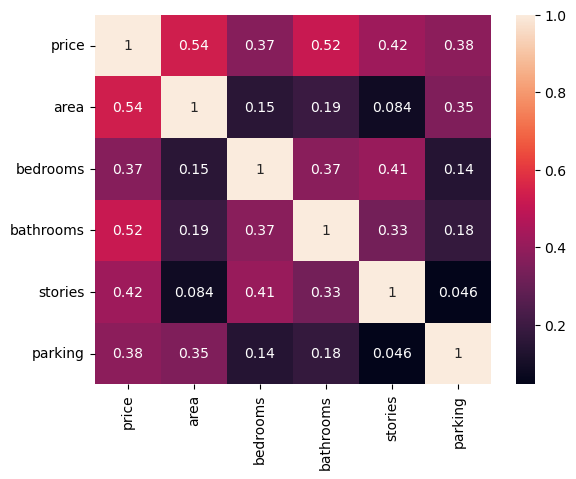

In [102]:
sns.heatmap(df.corr(), annot=True,)
plt.show()

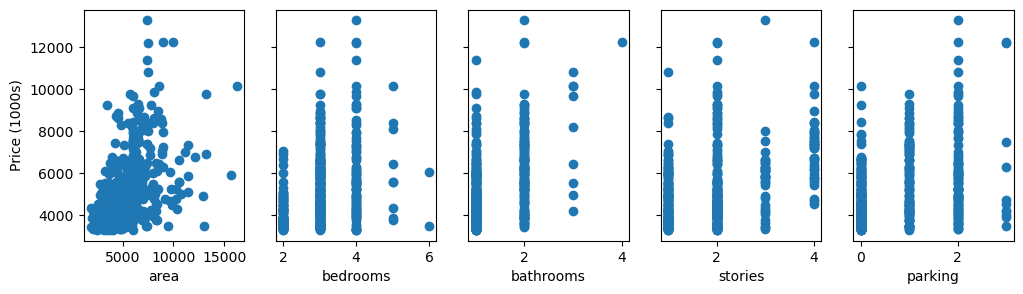

In [103]:
X_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

fig, ax = plt.subplots(1, 5, figsize=(12,3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price (1000s)")
plt.show()

#### Model

In [142]:
def normalise_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [143]:
b_init = 800
w_init = np.array([1.2, 2000, 2000, 2000, 2000])

In [144]:
# model
def predict(X, y, w, b):
    return np.dot(w, X) + b

In [145]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    
    f_wb = np.dot(X, w) + b
    cost = (f_wb - y) ** 2
    
    total_cost = (1 / (2 * m)) * np.sum(cost)
    
    return total_cost

In [146]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    
    f_wb = np.dot(X, w) + b 
    error = f_wb - y 
    
    dj_dw = (1/m) * np.dot(X.T, error)
    dj_db = (1/m) * np.sum(error)
    
    return dj_dw, dj_db

In [147]:
def gradient_descent(X, y, w_in, b_in, num_iters, alpha, cost_function, gradient_function):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):

        dj_dw,dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
      
        if i<100000:
            J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history
    